This notebook is for testing the validity of warmup function.

In [1]:
import sys
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.metrics import classification_report

from spnc import spnc_anisotropy
import spnc_ml as ml

In [2]:
def NRMSE(Y,Y_pred):
    var = np.var(Y)
    return np.sqrt(np.square(Y_pred-Y).mean()/var)

def NRMSE_list(y,y_pred):
    Y = np.array(y)
    Y_pred = np.array(y_pred)
    return(NRMSE(Y,Y_pred))

baseline = 0.5825, no warmup

seed warmup: 1234
length warmup: 0
Warmup data: 0


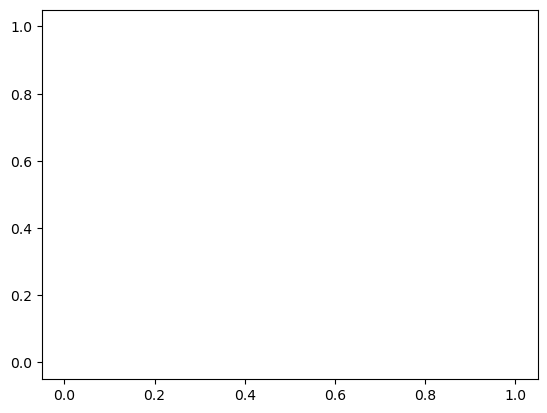

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  40
Deterministic mask will be used
1234
current phase: warmup
p1 in warmup & fast: 0.4999998889492148
current phase: train
p1 in train & fast: 0.4999998889492148
noise-free training output
restarted
Training data size:  80000
Training data shape:  (2000, 40)
Seed Training: 1234
current phase: warmup
p1 in warmup & fast: 0.4999998889492148
current phase: test
p1 in test & fast: 0.4999998889492148
noise-free testing output
restarted
Spacer NRMSE:0
0.004155719694704212 0.5825109294768851


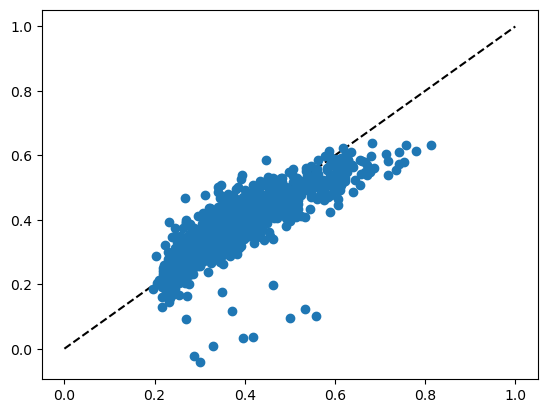

In [3]:
# NARMA10 parameters
Ntrain = 2000
Ntest = 1000
Nwarmup = 0

# Net parameters
Nvirt = 40  
m0 = 1e-2
bias = True

# Reservoir parameters
h = 0.4
theta_H = 90
k_s_0 = 0
phi = 45
beta_prime = 10

# Params
params = {
    'theta':1/3, 
    'gamma':.25, 
    'delay_feedback':0, 
    'Nvirt':Nvirt,
    'noise_enable': 'None',
    'noise_seed': 1234,
    'noise_mean':0.0001,
    'noise_std':0.00013,
    'seed_warmup': 1234,
    'length_warmup': Nwarmup,
    'train_sample': Ntrain*Nvirt,
    'test_sample': Ntest*Nvirt,
    'warmup_sample': Nwarmup*Nvirt,
}

spn = spnc_anisotropy(h, theta_H, k_s_0, phi, beta_prime,restart = True,Primep1=None)
transformf = spn.gen_signal_fast_delayed_feedback

# run
(y_test_f,y_pred_f) = ml.spnc_narma10_warmup(Ntrain,Ntest,Nvirt,m0,bias,transformf,params,seed_NARMA=1234,fixed_mask=True,return_outputs=True)

add warmup, length = 50, nrmse = 0.62049

seed warmup: 1234
length warmup: 50
seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  40
Deterministic mask will be used
1234
current phase: warmup
p1 in warmup & fast: 0.4999998889492148
current phase: train
p1 in train & fast: [0.49541871]
noise-free training output
restarted
Training data size:  80000
Training data shape:  (2000, 40)
Seed Training: 1234
current phase: warmup
p1 in warmup & fast: 0.4999998889492148
current phase: test
p1 in test & fast: [0.49541871]
noise-free testing output
restarted
Spacer NRMSE:0
0.004715300744673825 0.6204912389186418


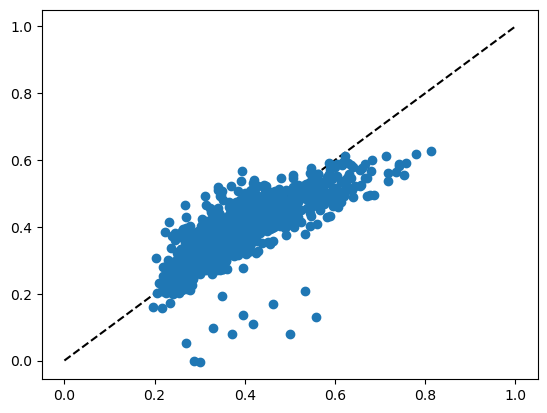

In [10]:
# NARMA10 parameters
Ntrain = 2000
Ntest = 1000
Nwarmup = 50

# Net parameters
Nvirt = 40  
m0 = 1e-2
bias = True

# Reservoir parameters
h = 0.4
theta_H = 90
k_s_0 = 0
phi = 45
beta_prime = 10

# Params
params = {
    'theta':1/3, 
    'gamma':.25, 
    'delay_feedback':0, 
    'Nvirt':Nvirt,
    'noise_enable': 'None',
    'noise_seed': 1234,
    'noise_mean':0.0001,
    'noise_std':0.00013,
    'seed_warmup': 1234,
    'length_warmup': Nwarmup,
    'train_sample': Ntrain*Nvirt,
    'test_sample': Ntest*Nvirt,
    'warmup_sample': Nwarmup*Nvirt,
}

spn = spnc_anisotropy(h, theta_H, k_s_0, phi, beta_prime,restart = True,Primep1=None)
transformf = spn.gen_signal_fast_delayed_feedback

# run
(y_test_f,y_pred_f) = ml.spnc_narma10_warmup(Ntrain,Ntest,Nvirt,m0,bias,transformf,params,seed_NARMA=1234,fixed_mask=True,return_outputs=True)

have a look at unrestart model with warm up, nrmse = 0.6238

seed warmup: 1234
length warmup: 20
seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  40
Deterministic mask will be used
1234
current phase: warmup
p1 in warmup & fast: 0.4999998889492148
current phase: train
p1 in train & fast: [0.49634106]
noise-free training output
skip restarting..
Training data size:  80000
Training data shape:  (2000, 40)
Seed Training: 1234
current phase: test
p1 in test & fast: [0.49599308]
noise-free testing output
skip restarting..
Spacer NRMSE:0
0.004767246812220442 0.6238996953542324


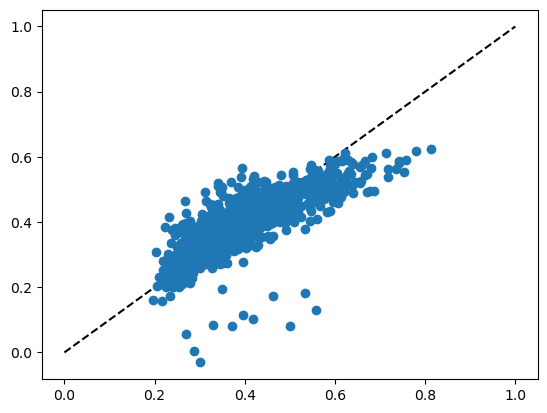

In [4]:
# NARMA10 parameters
Ntrain = 2000
Ntest = 1000
Nwarmup = 20

# Net parameters
Nvirt = 40  
m0 = 1e-2
bias = True

# Reservoir parameters
h = 0.4
theta_H = 90
k_s_0 = 0
phi = 45
beta_prime = 10

# Params
params = {
    'theta':1/3, 
    'gamma':.25, 
    'delay_feedback':0, 
    'Nvirt':Nvirt,
    'noise_enable': 'None',
    'noise_seed': 1234,
    'noise_mean':0.0001,
    'noise_std':0.00013,
    'seed_warmup': 1234,
    'length_warmup': Nwarmup,
    'train_sample': Ntrain*Nvirt,
    'test_sample': Ntest*Nvirt,
    'warmup_sample': Nwarmup*Nvirt,
}

spn = spnc_anisotropy(h, theta_H, k_s_0, phi, beta_prime,restart = False,Primep1=None)
transformf = spn.gen_signal_fast_delayed_feedback

# run
(y_test_f,y_pred_f) = ml.spnc_narma10_warmup(Ntrain,Ntest,Nvirt,m0,bias,transformf,params,seed_NARMA=1234,fixed_mask=True,return_outputs=True)

Looks like warmup does work, but it is a negative influence. Let's have a look on the trace difference between warmup and coolup

seed warmup: 1234
length warmup: 0
seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  40
Deterministic mask will be used
1234
current phase: warmup
p1 in warmup & fast: 0.4999998889492148
current phase: train
p1 in train & fast: 0.4999998889492148
noise-free training output
restarted
Training data size:  80000
Training data shape:  (2000, 40)
Seed Training: 1234
current phase: warmup
p1 in warmup & fast: 0.4999998889492148
current phase: test
p1 in test & fast: 0.4999998889492148
noise-free testing output
restarted
Spacer NRMSE:0
0.004155719694704212 0.5825109294768851


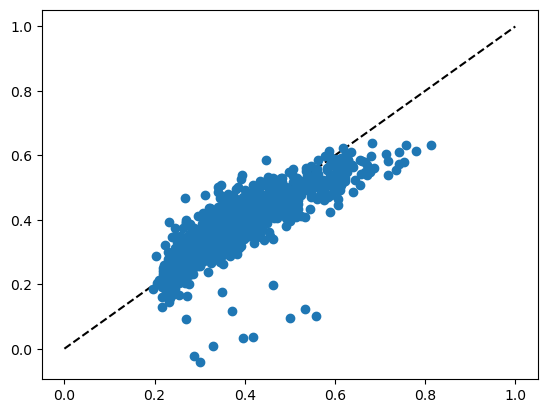

In [13]:
# NARMA10 parameters
Ntrain = 2000
Ntest = 1000
Nwarmup = 0

# Net parameters
Nvirt = 40 
m0 = 1e-2
bias = True

# Reservoir parameters
h = 0.4
theta_H = 90
k_s_0 = 0
phi = 45
beta_prime = 10

# Params
params = {
    'theta':1/3, 
    'gamma':.25, 
    'delay_feedback':0, 
    'Nvirt':Nvirt,
    'noise_enable': 'None',
    'noise_seed': 1234,
    'noise_mean':0.0001,
    'noise_std':0.00013,
    'seed_warmup': 1234,
    'length_warmup': Nwarmup,
    'train_sample': Ntrain*Nvirt,
    'test_sample': Ntest*Nvirt,
    'warmup_sample': Nwarmup*Nvirt,
}

spn = spnc_anisotropy(h, theta_H, k_s_0, phi, beta_prime,restart = True,Primep1=None)
transformf = spn.gen_signal_fast_delayed_feedback

# run
(y_train_f,y_train_pred_f) = ml.spnc_narma10_warmup(Ntrain,Ntest,Nvirt,m0,bias,transformf,params,seed_NARMA=1234,fixed_mask=True,return_y_train=True)


seed warmup: 1234
length warmup: 10
seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  40
Deterministic mask will be used
1234
current phase: warmup
p1 in warmup & fast: 0.4999998889492148
current phase: train
p1 in train & fast: [0.49675845]
noise-free training output
restarted
Training data size:  80000
Training data shape:  (2000, 40)
Seed Training: 1234
current phase: warmup
p1 in warmup & fast: 0.4999998889492148
current phase: test
p1 in test & fast: [0.49675845]
noise-free testing output
restarted
Spacer NRMSE:0
0.004849934853731726 0.6292872137519281


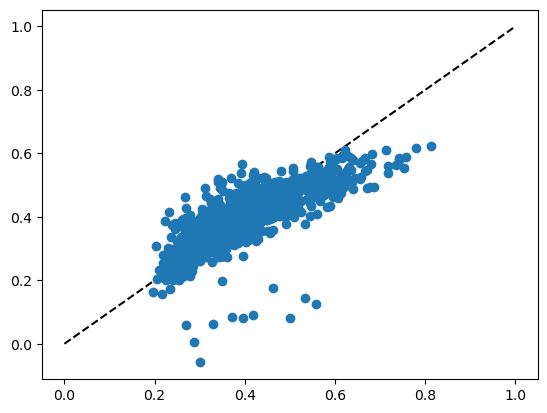

In [14]:
# NARMA10 parameters
Ntrain = 2000
Ntest = 1000
Nwarmup = 10

# Net parameters
Nvirt = 40
m0 = 1e-2
bias = True

# Reservoir parameters
h = 0.4
theta_H = 90
k_s_0 = 0
phi = 45
beta_prime = 10

# Params
params = {
    'theta':1/3, 
    'gamma':.25, 
    'delay_feedback':0, 
    'Nvirt':Nvirt,
    'noise_enable': 'None',
    'noise_seed': 1234,
    'noise_mean':0.0001,
    'noise_std':0.00013,
    'seed_warmup': 1234,
    'length_warmup': Nwarmup,
    'train_sample': Ntrain*Nvirt,
    'test_sample': Ntest*Nvirt,
    'warmup_sample': Nwarmup*Nvirt,
}

spnw = spnc_anisotropy(h, theta_H, k_s_0, phi, beta_prime,restart = True,Primep1=None)
transformw = spnw.gen_signal_fast_delayed_feedback

# run
(y_train_w,y_train_pred_w) = ml.spnc_narma10_warmup(Ntrain,Ntest,Nvirt,m0,bias,transformw,params,seed_NARMA=1234,fixed_mask=True,return_y_train=True)

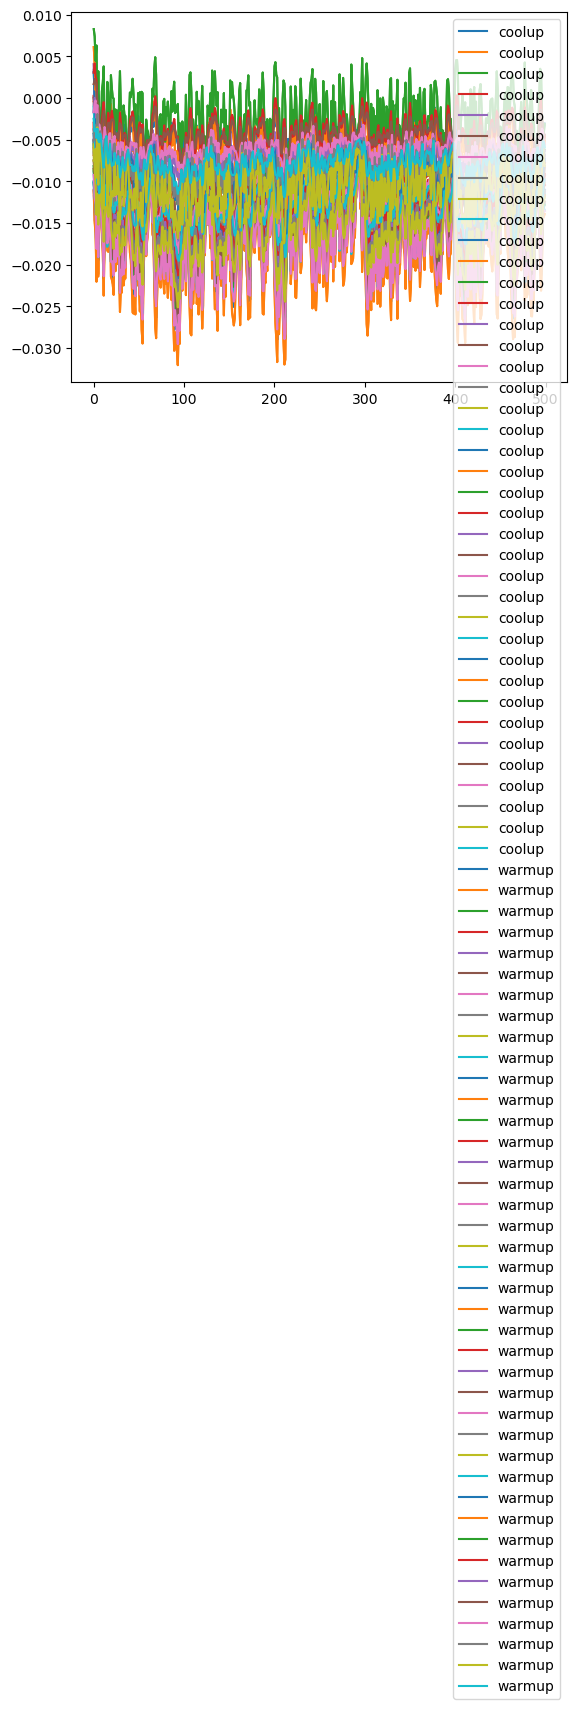

In [16]:
spac = 0
window = 500

# ploy
plt.figure()
plt.plot(y_train_pred_f[spac:spac+window],label='coolup')
plt.plot(y_train_pred_w[spac:spac+window],label='warmup')
# plt.plot(y_train_f[spac:spac+window],label='desired')
plt.legend()
plt.show()